In [1]:
import mne
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 5]

from mne.decoding import UnsupervisedSpatialFilter
from sklearn.decomposition import PCA, FastICA

from sklearn.model_selection import train_test_split, StratifiedKFold, StratifiedShuffleSplit

from sklearn.linear_model import LogisticRegression

In [2]:
#search and store names of all the files in folder in array
def arrayFiles(path):
    folderContent = os.listdir(path)
    fifFiles = []
    for i in folderContent :
        fifFiles.append(path + "/" + i)
    
    return fifFiles

In [3]:
#concatenate path to name of each file and store in array for reading in data
path = '/Volumes/flash64/EpochedEEG'
allFifFiles = arrayFiles(path)
#print(allFifFiles)

In [4]:
#print(allFifFiles[0])
epoch = mne.read_epochs(allFifFiles[0],preload=True)

Reading /Volumes/flash64/EpochedEEG/20131216_1441_epo.fif ...
    Found the data of interest:
        t =    -199.22 ...     500.00 ms
        0 CTF compensation matrices available
5424 matching events found
Applying baseline correction (mode: mean)
5424 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated


In [5]:
epoch_copy = epoch.copy().crop(0,0.5)


In [6]:
#events = mne.pick_events(epoch.events, exclude=[133, 134])

In [7]:
events = epoch_copy.events
print(events[:,-1])

[131  31 144 ...   1 131 134]


In [8]:
#plotting the data to see it work.
#epoch_copy.plot(n_channels=20)

In [9]:
event_id = epoch_copy.event_id

In [10]:
X = epoch_copy.get_data()
y=epoch_copy.events[:,-1]

XX = X[:,-1] 

#init pca and fit to data
pca = UnsupervisedSpatialFilter(PCA(), average=False)
pca_data = pca.fit_transform(X)


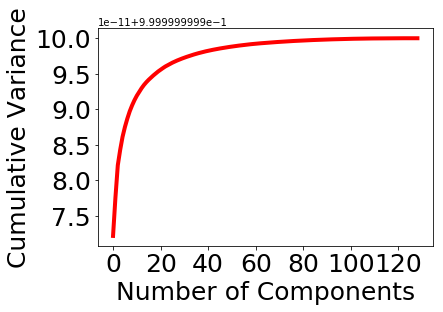

In [11]:
comp_variance = np.cumsum(pca.estimator.explained_variance_ratio_)
plt.plot(comp_variance, linewidth = 4.0, color = 'R')
plt.xlabel('Number of Components', fontsize = 25)
plt.ylabel('Cumulative Variance', fontsize = 25);
plt.xticks(fontsize = 25);
plt.yticks(fontsize = 25);

In [16]:
logReg = LogisticRegression()

#cross validation
cv = StratifiedKFold(n_splits = 10, shuffle=True)

#fit with cross validation on original data
preds = np.empty(len(y))
scores = []
for train, test, in cv.split(XX, y):
    logReg.fit(XX[train], y[train])
    #preds[test] = logReg.predict(X[test])
    scores.append(logReg.score(XX[test],y[test]))

In [13]:
print("mean classification score", np.mean(scores))

mean classification score 0.3991859058665899
